In [67]:
import ast
import pandas as pd
import json
import numpy as np
from collections import defaultdict
from item.item_list import (ItemList, Item)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nlp.preprocessing import PreprocessingText
from nlp.utils import *
from IPython.display import display

In [68]:
preprocess = PreprocessingText()

### Files reading

In [4]:
itemList = ItemList()
itemList.load_items_from_file('../data/items_preprocessed_complete_druid.csv.zip')
itemsDf = itemList.items_df

In [88]:
itemList = ItemList()
itemList.load_items_from_file('../data/items_preprocessed_complete_druid_v2.csv.zip')
itemsDf2 = itemList.items_df

In [89]:
len(itemsDf)

11131525

In [90]:
len(itemsDf2)

10901983

### Analysis Methods

In [5]:
def word_cloud2(frequencies, title, prefer_horizontal=0.90):
    wordcloud = WordCloud(prefer_horizontal=prefer_horizontal, collocations=False, width=1600, height=800).generate_from_frequencies(frequencies)
#     fig, ax = plt.subplots(figsize=(16,8))            
#     ax.imshow(wordcloud)
#     ax.set_axis_off()
#     plt.imshow(wordcloud)
#     plt.title(title)
    return wordcloud

In [6]:
def word_cloud(frequencies, title, prefer_horizontal=0.90):
    wordcloud = WordCloud(prefer_horizontal=prefer_horizontal, collocations=False, width=1600, height=800).generate_from_frequencies(frequencies)
    fig, ax = plt.subplots(figsize=(16,8))            
    ax.imshow(wordcloud)
    ax.set_axis_off()
    plt.imshow(wordcloud)
    plt.title(title)
    return wordcloud

In [7]:
def get_items_without_first_token(itemsDf):
    # Filtering items without first token
    noWordsTokensFreq = defaultdict(int)
    tokensDescriptions = defaultdict(list)
    firstTokenFreq = defaultdict(int)
    secondTokenFreq = defaultdict(int)
    thirdTokenFreq = defaultdict(int)
    noWords = itemsDf.loc[itemsDf.palavras == '[]']
    noWordsFreq = round((len(noWords)/itemsDf.size)*100, 2)
    
    print(str(f'Quantidade de items sem palavras: {len(noWords)} ({noWordsFreq}%)'))
    
    for item in noWords['original_prep']:
        tokens = ast.literal_eval(item)
        if len(tokens) >= 3:
            firstTokenFreq[tokens[0]] += 1
            secondTokenFreq[tokens[1]] += 1
            thirdTokenFreq[tokens[2]] += 1
        elif len(tokens) >= 2:
            firstTokenFreq[tokens[0]] += 1
            secondTokenFreq[tokens[1]] += 1
        elif len(tokens) == 1:
            firstTokenFreq[tokens[0]] += 1
        else:
            print('*****', tokens)
        for token in tokens:
            tokensDescriptions[token].append(' '.join(tokens))
            noWordsTokensFreq[token] += 1
    
    noWordsTokensFreq = dict(sorted(noWordsTokensFreq.items(), key=lambda x: x[1], reverse=True))
    firstTokenFreq = dict(sorted(firstTokenFreq.items(), key=lambda x: x[1], reverse=True))
    secondTokenFreq = dict(sorted(secondTokenFreq.items(), key=lambda x: x[1], reverse=True))
    thirdTokenFreq = dict(sorted(thirdTokenFreq.items(), key=lambda x: x[1], reverse=True))
    
    return noWords, noWordsTokensFreq, tokensDescriptions, firstTokenFreq, secondTokenFreq, thirdTokenFreq

In [8]:
def proprocess_dataframe(itemsDf):
    removedTokens = defaultdict(int)
    changedTokens = defaultdict(int)
    corrections = defaultdict(str)
    correctionPairs = defaultdict(int)
    for index,row in itemsDf.iterrows():
        original = row['original'].lower().strip()
        preprocessed = preprocess.preprocess_document(row['original'])
#         print('****', preprocessed)
        if(original != preprocessed):
#             print('** ORIGINAL DESCRIPTION:', original)
#             print('** PREPROCESSED DESCRIPTION:', preprocessed)
            removed = list(set(original).difference(set(preprocessed)))
            for token in removed:
                removedTokens[token] += 1
        corrected = ' '.join(preprocess.spellcheck_document(preprocessed)).strip()
        if(preprocessed != corrected):
#             print('** CORRECTED DESCRIPTION:', preprocessed)
            preprocessed = preprocessed
            corrected = corrected.split(' ')
            for i in range(len(preprocessed)):
                if preprocessed[i] != corrected[i]:
                    pair = preprocessed[i] + '(' + corrected[i] + ')'
                    corrections[preprocessed[i]] = corrected[i]
                    correctionPairs[pair] += 1
                    changedTokens[preprocessed[i]] += 1
#         print('-'*40)
    return [removedTokens, changedTokens, corrections, correctionPairs]

In [9]:
def get_category_tokens_frequency(df, category):
    category_tokens = defaultdict(int)
    for label, row in df.iterrows():
        for token in ast.literal_eval(row[category]):
            category_tokens[token] += 1
    return dict(sorted(category_tokens.items(), key=lambda x: x[1], reverse=True))

In [10]:
def get_desc_category_frequency(df, category):
    desc_category_freq = defaultdict(int)
    for label, row in df.iterrows():
        tokens = ast.literal_eval(row[category])
        desc_category_freq[len(tokens)] += 1
    return dict(sorted(desc_category_freq.items(), key=lambda x: x[1], reverse=True))

In [11]:
def get_description_lenght_frequency(df):
    original = defaultdict(int)
    prep = defaultdict(int)
    for label, row in df.iterrows():
        original_lenght = len(row['original'].split(' '))
        prep_lenght = len(ast.literal_eval(row['original_prep']))
        original[original_lenght] += 1
        prep[prep_lenght] += 1
    return [original, prep]

In [12]:
def plot_hist_from_dict(data, title, text, customInterval=False):
    interval = np.arange(0, 10, 1)
    labels, values = zip(*data.items())
    plt.rcParams["figure.figsize"] = (16,8)
    plt.title(title)
    plt.figtext(0.7,0.5,text)
    if(max(data.keys()) > 10 and customInterval):
        interval = np.arange(0, max(data.keys()), 5)
        plt.xticks(interval)
    plt.xlim(0, max(data.keys()))
    plt.bar(labels, values)
    plt.show()

### Analysis

In [91]:
noWordsDf, noWordsTokensFreq, tokensDescriptions, firstTokenFreq, secondTokenFreq, thirdTokenFreq = get_items_without_first_token(itemsDf)
noWordsDf2, noWordsTokensFreq2, tokensDescriptions2, firstTokenFreq2, secondTokenFreq2, thirdTokenFreq2 = get_items_without_first_token(itemsDf2)

Quantidade de items sem palavras: 32163 (0.02%)
Quantidade de items sem palavras: 3461 (0.0%)


In [73]:
noWordsDf2.head(200)

,palavras,unidades_medida,numeros,cores,materiais,tamanho,quantidade,preco,dsc_unidade_medida,original,original_prep,ano,licitacao,licitacao_item,item_id
1509,[],[],['4.00e+00'],[],[],[],['kit'],95.69,unidade,KIT 04 125382,"['kit', '4']",2016,350215,11387776,1509
5958,[],['ui'],['6.00e+02'],[],[],[],[],5.30,unidade,BENZILPENIICILINABENZATINA 600.000 UI,"['ui', '600.000']",2018,410004,13089902,5958
9550,[],[],[],[],[],[],['kit'],26.30,unidade,KIT (170601013152008),['kit'],2017,459333,14733143,9550
17872,[],[],"['1.40e+01', '3.40e+03']",[],[],[],[],360.00,unidade,18570R14-3398,"['r', '14', '3398']",2016,57399,1792719,17872
31368,[],[],"['8.00e+00', '4.00e+00']",[],[],[],['kit'],200.17,unidade,4 KIT'S 8,"['kit', 's', '8', '4']",2014,80340,2659137,31368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672750,[],[],['nan'],[],[],[],[],27.70,unidade,NAN H.A,['nan'],2018,562740,18396152,672750
676575,[],[],['1.00e+00'],[],[],[],[],1785.00,servico,SERV.INST.SIST.MONITORAMENTO 1,['1'],2019,602509,19688496,676575
676962,[],['mm'],['4.00e+01'],[],['pvc'],[],[],3.80,unidade,T PVC 40 MM,"['t', 'pvc', '40', 'mm']",2019,606507,19834139,676962
685299,[],[],"['7.00e+00', '4.00e+00']",[],[],[],['kit'],200.17,unidade,4 KIT'S 7,"['kit', 's', '7', '4']",2014,80340,2659138,685299


In [18]:
noWordsDf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9603 entries, 1509 to 10901630
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   palavras            9603 non-null   object 
 1   unidades_medida     9603 non-null   object 
 2   numeros             9603 non-null   object 
 3   cores               9603 non-null   object 
 4   materiais           9603 non-null   object 
 5   tamanho             9603 non-null   object 
 6   quantidade          9603 non-null   object 
 7   preco               9603 non-null   float64
 8   dsc_unidade_medida  9594 non-null   object 
 9   original            9603 non-null   object 
 10  original_prep       9603 non-null   object 
 11  ano                 9603 non-null   int64  
 12  licitacao           9603 non-null   int64  
 13  licitacao_item      9603 non-null   int64  
 14  item_id             9603 non-null   int64  
dtypes: float64(1), int64(4), object(10)
memory usage

In [19]:
noWordsDf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9603 entries, 1509 to 10901630
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   palavras            9603 non-null   object 
 1   unidades_medida     9603 non-null   object 
 2   numeros             9603 non-null   object 
 3   cores               9603 non-null   object 
 4   materiais           9603 non-null   object 
 5   tamanho             9603 non-null   object 
 6   quantidade          9603 non-null   object 
 7   preco               9603 non-null   float64
 8   dsc_unidade_medida  9594 non-null   object 
 9   original            9603 non-null   object 
 10  original_prep       9603 non-null   object 
 11  ano                 9603 non-null   int64  
 12  licitacao           9603 non-null   int64  
 13  licitacao_item      9603 non-null   int64  
 14  item_id             9603 non-null   int64  
dtypes: float64(1), int64(4), object(10)
memory usage

In [21]:
tokens_category_df = noWordsDf2[["unidades_medida","numeros","cores","materiais", "tamanho","quantidade", "original_prep"]]

In [22]:
tokens_category_df.to_csv('../data/categoria_tokens_sem_palavras_2.csv')

(-0.5, 1599.5, 799.5, -0.5)

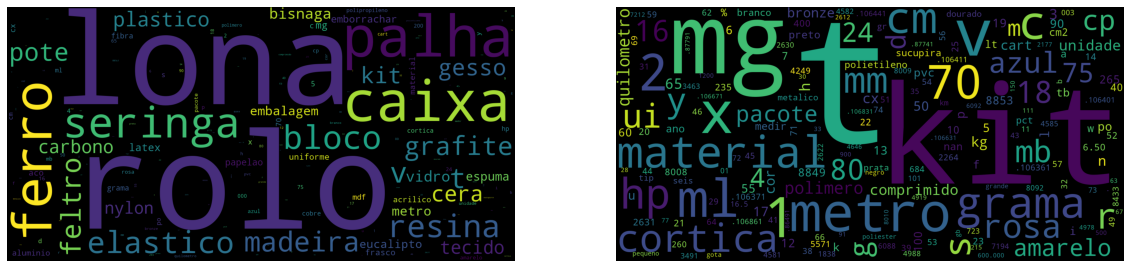

In [92]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
wordcloud = word_cloud2(firstTokenFreq, 'Primeiro token das descrições sem token')
ax.imshow(wordcloud)
ax.axis('off')

wordcloud2 = word_cloud2(firstTokenFreq2, 'Primeiro token das descrições sem token')
ax = fig.add_subplot(1,2,2)
ax.imshow(wordcloud2)
ax.axis('off')

In [93]:
noWordsDf2[noWordsDf2['original_prep'].str.contains("rosa")]

,palavras,unidades_medida,numeros,cores,materiais,tamanho,quantidade,preco,dsc_unidade_medida,original,original_prep,ano,licitacao,licitacao_item,item_id
395510,[],[],[],['rosa'],[],[],[],7.13,unidade,ROSAS,['rosa'],2018,499665,16246938,395510
876559,[],[],[],['rosa'],[],[],[],4.39,unidade,ROSA,['rosa'],2018,401306,12765069,876559
1016805,[],[],[],['rosa'],[],[],[],4.00,duzia,ROSAS,['rosa'],2015,136819,4718326,1016805
2289933,[],[],[],['rosa'],[],[],[],1.60,pacote,E V A ROSA,"['v', 'rosa']",2016,371407,11941307,2289933
2540346,[],[],[],['rosa'],[],[],[],5.00,unidade,ROSAS,['rosa'],2015,107647,3760589,2540346
2882286,[],[],[],"['rosa', 'claro']",[],[],[],1.15,metro,T N T ROSA CLARO,"['t', 'n', 'rosa', 'claro']",2014,250368,8509891,2882286
3166446,[],[],['1.00e+01'],['rosa'],[],[],"['pct', 'unid']",22.99,pacote,E V A ROSA PCT C/ 10 UNID -,"['v', 'rosa', 'pct', 'c', '10', 'unid']",2018,419735,13411264,3166446
3276161,[],[],[],"['rosa', 'vermelho', 'branco']",[],[],[],2.50,unidade,ROSA VERMELHA OU BRANCA,"['rosa', 'vermelho', 'branco']",2018,428550,13721469,3276161
3468725,[],[],[],['rosa'],[],['grande'],[],5.00,unidade,ROSA GRANDE,"['rosa', 'grande']",2015,119712,4151843,3468725
3700725,[],[],[],['rosa'],"['polimero', 'acrilico']",[],[],30.00,pote 225 grama,"POLIMERO DE ACRILICO, ROSA","['polimero', 'acrilico', 'rosa']",2014,255169,8684045,3700725


In [56]:
len(noWordsDf2)

4475

(-0.5, 1599.5, 799.5, -0.5)

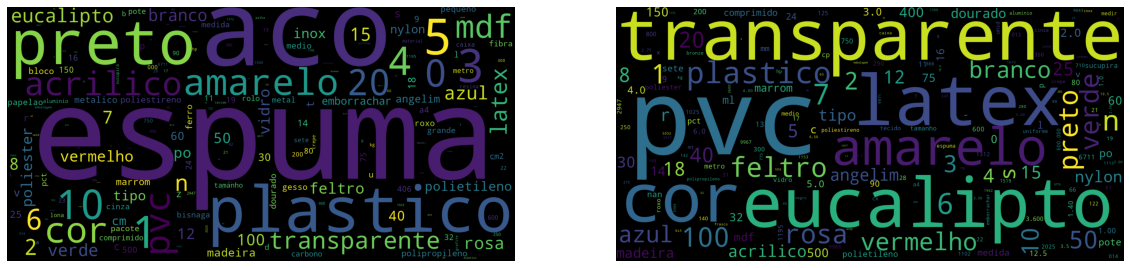

In [24]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(1,2,1)
wordcloud = word_cloud2(secondTokenFreq, 'Segundo token das descrições sem token')
ax.imshow(wordcloud)
ax.axis('off')

wordcloud2 = word_cloud2(secondTokenFreq2, 'Segundo token das descrições sem token')
ax = fig.add_subplot(1,2,2)
ax.imshow(wordcloud2)
ax.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

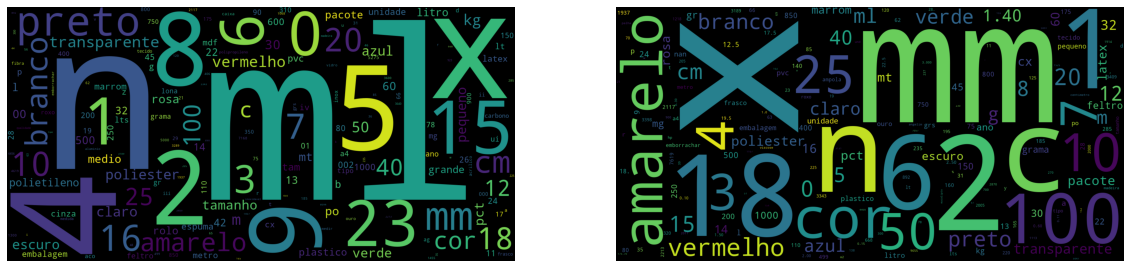

In [25]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(1,2,1)
wordcloud = word_cloud2(thirdTokenFreq, 'Terceiro token das descrições sem token')
ax.imshow(wordcloud)
ax.axis('off')

wordcloud2 = word_cloud2(thirdTokenFreq2, 'Terceiro token das descrições sem token')
ax = fig.add_subplot(1,2,2)
ax.imshow(wordcloud2)
ax.axis('off')

In [26]:
tokens_desc = defaultdict(lambda: defaultdict(int))
for token in list(noWordsTokensFreq.keys())[:10]:
#     print(f'#### {token} ####')
    for desc in tokensDescriptions[token]:
        tokens_desc[token][desc] +=1
#         print(f' - {desc}')
    tokens_desc[token] = dict(sorted(tokens_desc[token].items(), key=lambda x: x[1], reverse=True)[:10])
    
tokens_desc2 = defaultdict(lambda: defaultdict(int))
for token in list(noWordsTokensFreq2.keys())[:10]:
#     print(f'#### {token} ####')
    for desc in tokensDescriptions2[token]:
        tokens_desc2[token][desc] +=1
#         print(f' - {desc}')
    tokens_desc2[token] = dict(sorted(tokens_desc2[token].items(), key=lambda x: x[1], reverse=True)[:10])

In [27]:
for token in tokens_desc:
    print(f'# 10 descrições mais frequentes para o token {token}')
    for desc in tokens_desc[token]:
        print(f'- {desc}')

# 10 descrições mais frequentes para o token x
- lona preto 4 x 1
- lona preto 8 x 1
- lona preto 4 x 100
- lona preto 6 x 1
- caixa pvc 4 x
- caixa 4 x 2
- caixa pvc 4 x 2
- caixa 4 x
- lona amarelo 4 x 1
- bloco 20 x 40
# 10 descrições mais frequentes para o token cm
- rolo espuma 9 cm
- rolo espuma 5 cm
- rolo espuma 15 cm
- rolo espuma 23 cm
- rolo espuma 10 cm
- caixa cm 2
- rolo poliester 9 cm
- bloco 15 cm
- rolo gesso 12 cm
- bloco 10 cm
# 10 descrições mais frequentes para o token rolo
- rolo espuma 9 cm
- rolo espuma 5 cm
- rolo espuma 15 cm
- rolo espuma 23 cm
- rolo espuma
- rolo espuma 10 cm
- rolo
- rolo poliester 9 cm
- rolo gesso 12 cm
- rolo poliester 23 cm
# 10 descrições mais frequentes para o token 1
- palha aco n 1
- lona preto 4 x 1
- seringa 1 ml
- ferro 1 4
- palha aco 1
- lona preto 8 x 1
- ferro 1 2
- gesso 1 kg
- lona preto 6 x 1
- lona amarelo 4 x 1
# 10 descrições mais frequentes para o token espuma
- rolo espuma 9 cm
- rolo espuma 5 cm
- rolo espuma 15 cm


In [28]:
for token in tokens_desc2:
    print(f'# 10 descrições mais frequentes para o token {token}')
    for desc in tokens_desc2[token]:
        print(f'- {desc}')

# 10 descrições mais frequentes para o token x
- madeira 8 x
- madeira 6 x
- madeira 12 x 6
- madeira 10 x 6 cm
- t 100 x
- feltro 290 x 120
- t 100 x 50 mm
- madeira 12 x 8
- elastico n 25 m x 15 mm
- madeira 8 x 15
# 10 descrições mais frequentes para o token feltro
- feltro
- tecido feltro
- feltro verde
- feltro vermelho
- feltro preto
- feltro branco
- feltro amarelo
- feltro azul
- feltro cor vermelho
- feltro cor branco
# 10 descrições mais frequentes para o token elastico
- elastico
- elastico latex n 18
- elastico latex
- elastico amarelo
- elastico latex 18
- elastico n 18
- elastico 1 cm
- elastico amarelo 18
- elastico latex amarelo 18
- elastico tipo latex
# 10 descrições mais frequentes para o token mm
- t pvc 40 mm
- t pvc 50 mm
- t pvc 100 mm
- t pvc 20 mm
- t pvc 32 mm
- t pvc 60 mm
- t pvc 25 mm
- t 100 mm
- t 40 mm pvc
- t 50 mm
# 10 descrições mais frequentes para o token madeira
- madeira eucalipto
- madeira 8 x
- madeira 6 x
- metro madeira 2 m
- madeira angelim
-

In [29]:
removedTokens, changedTokens, corrections, correctionPairs = proprocess_dataframe(noWordsDf)
removedTokens2, changedTokens2, corrections2, correctionPairs2 = proprocess_dataframe(noWordsDf2)

In [31]:
categories = ['palavras', 'unidades_medida', 'numeros', 'cores', 'materiais', 'tamanho', 'quantidade']

Categoria PALAVRAS não possui tokens


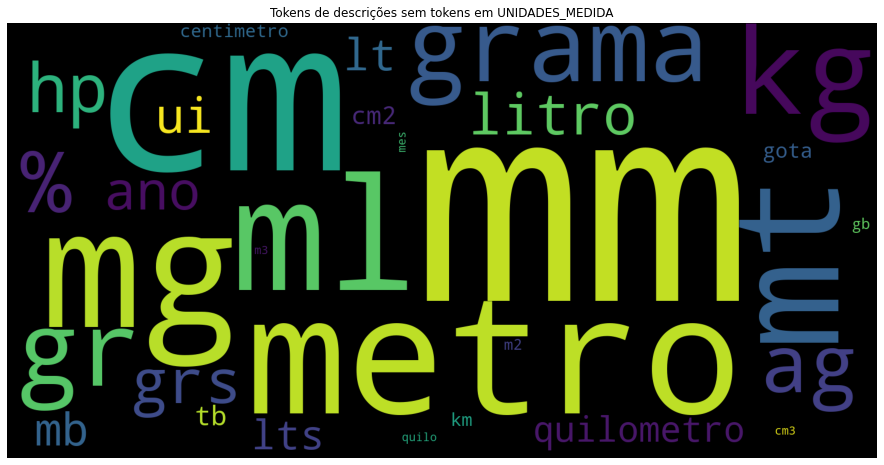

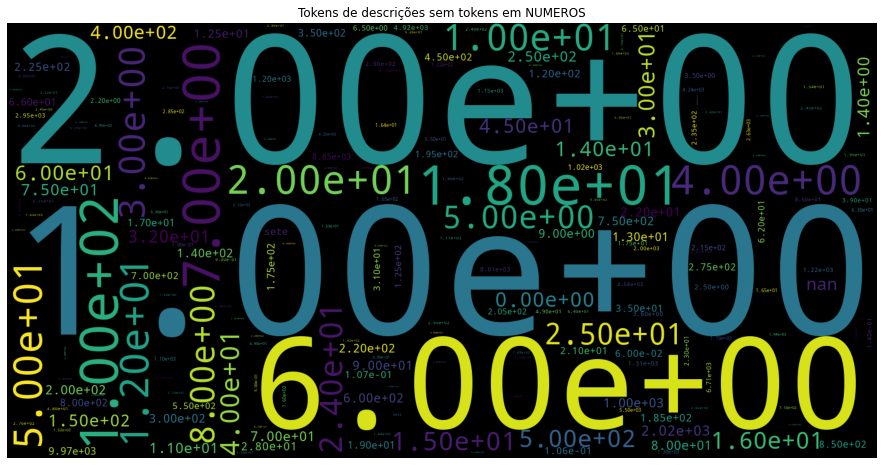

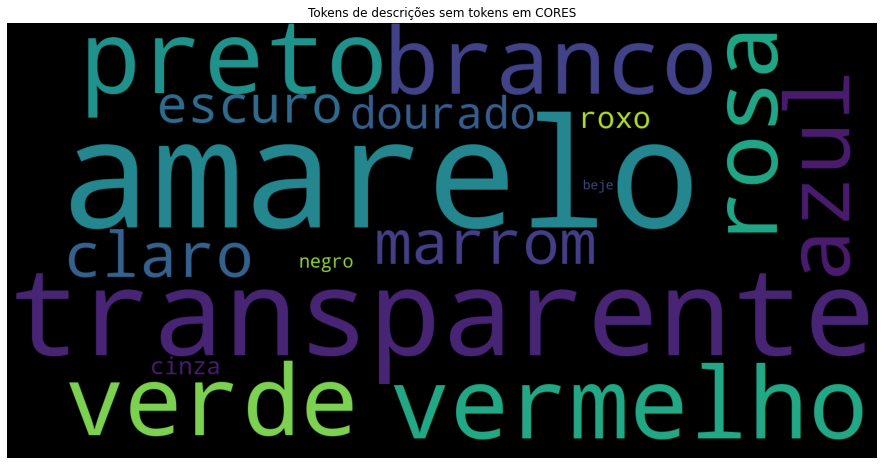

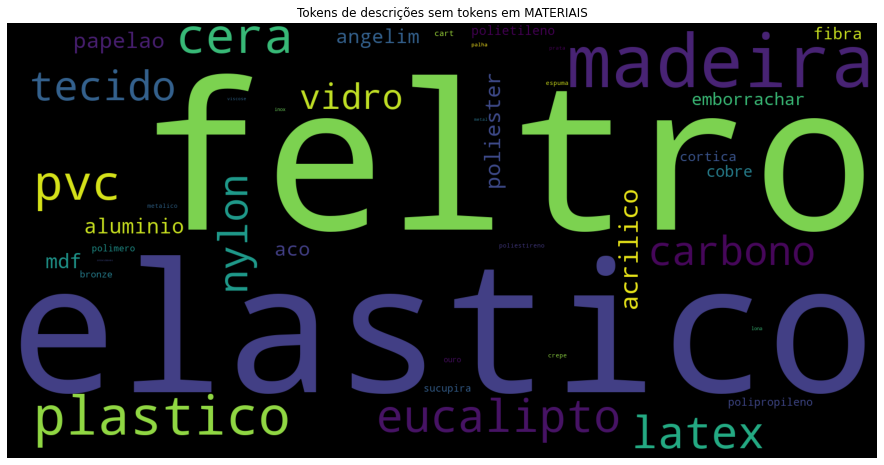

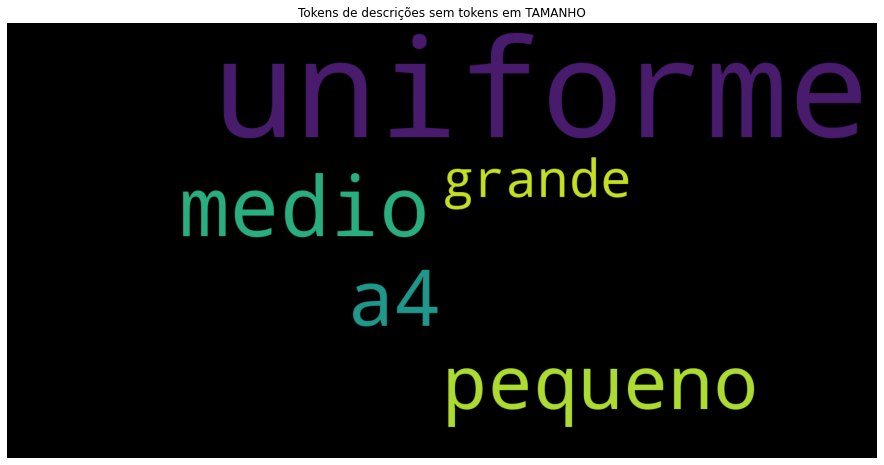

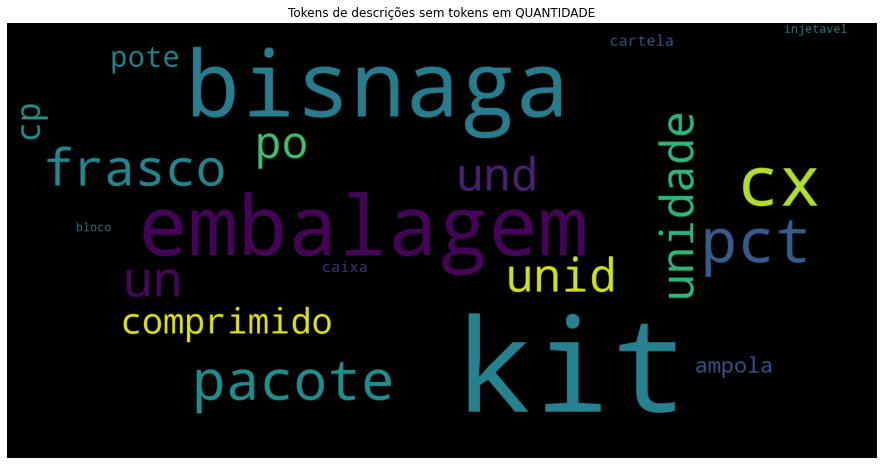

In [32]:
for i in range(len(categories)):
    freq = []
    freq = get_category_tokens_frequency(noWordsDf2, categories[i])
    if len(freq) > 0:
        word_cloud(freq, str(f'Tokens de descrições sem tokens em {categories[i].upper()}'))
    else:
        print(f'Categoria {categories[i].upper()} não possui tokens')

/dados01/workspace/ufmg.f01dcc/py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  # Remove the CWD from sys.path while we load stuff.


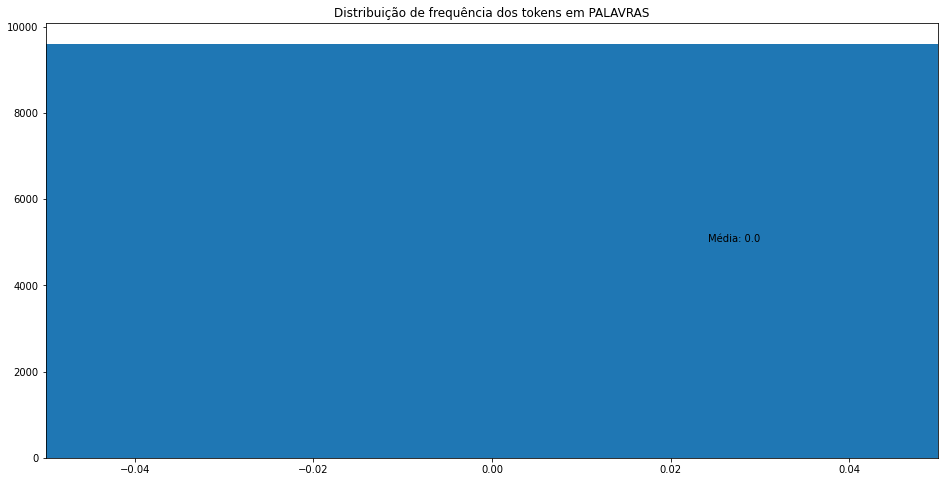

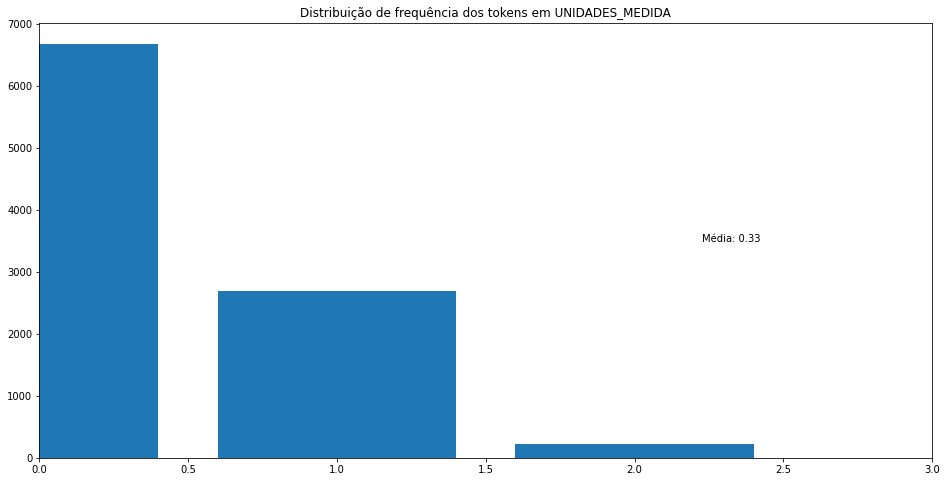

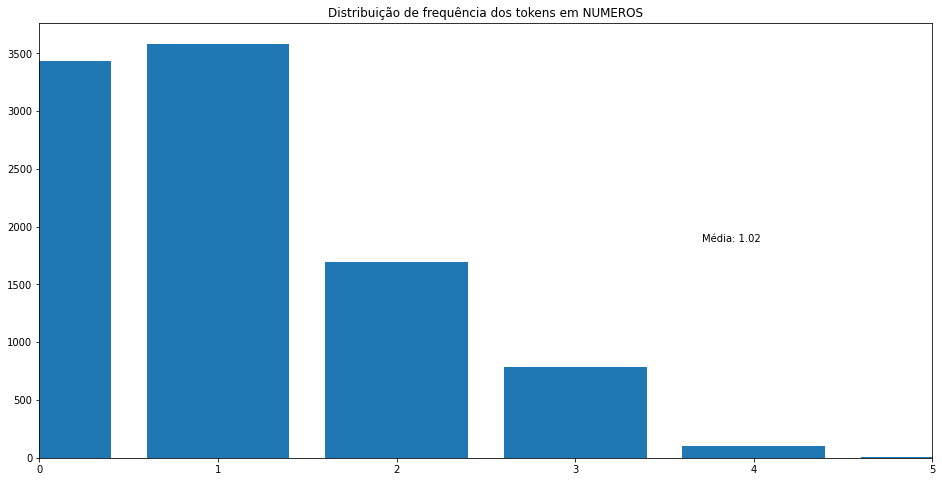

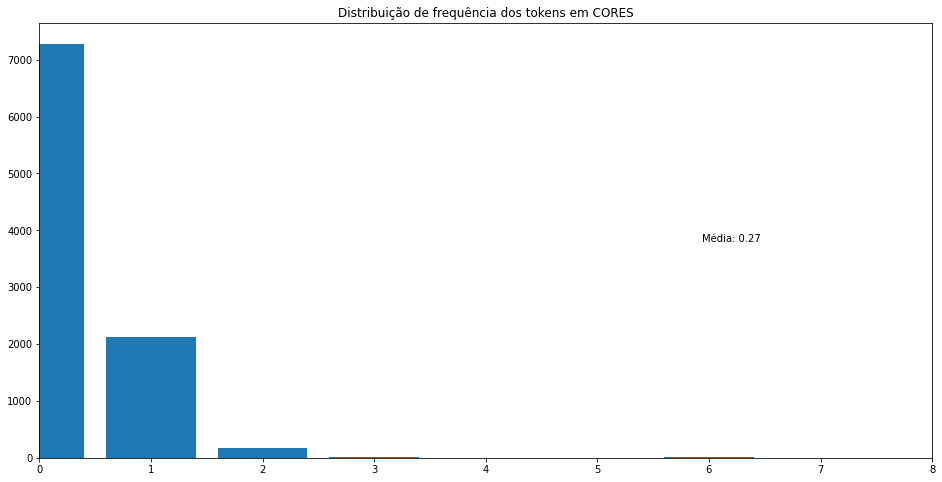

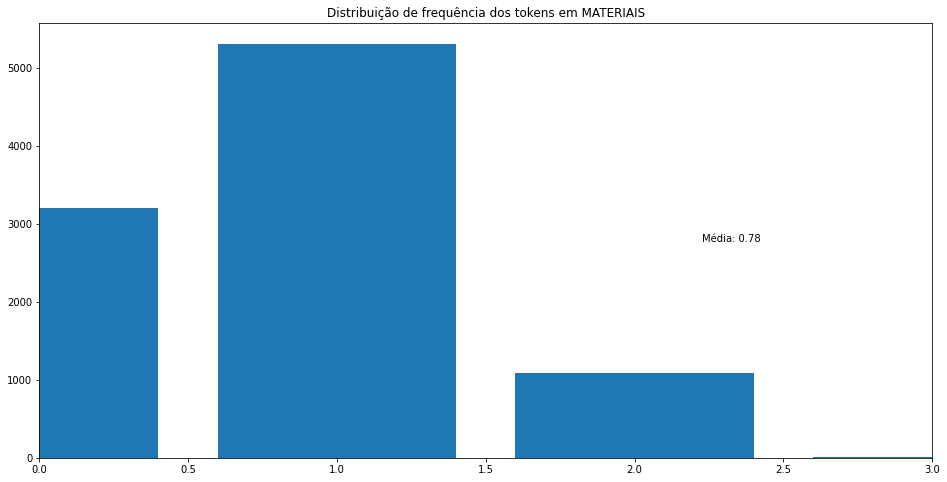

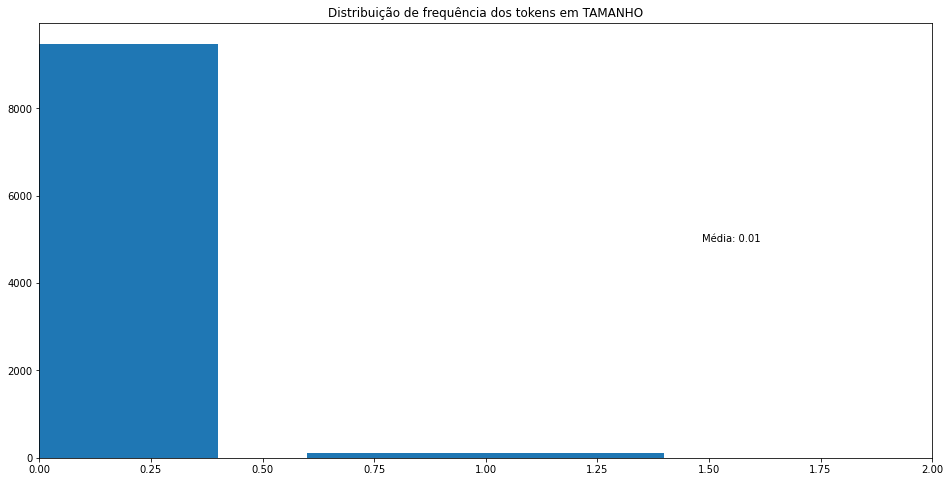

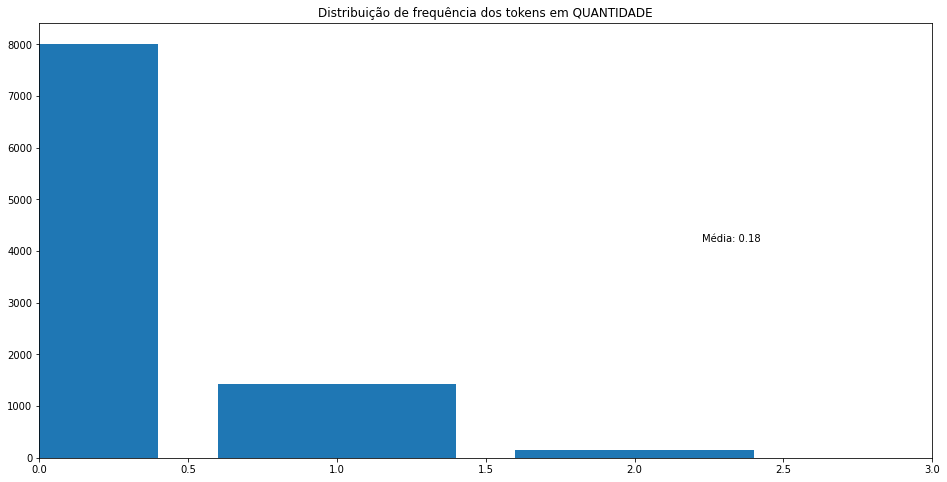

In [33]:
for i in range(len(categories)):
    freq = []
    freq = get_desc_category_frequency(noWordsDf2, categories[i])
    title = str(f'Distribuição de frequência dos tokens em {categories[i].upper()}')
    text = str(f'Média: {str(round(sum([k*v for k,v in freq.items()])/sum(v for v in freq.values()), 2))}')
    if len(freq) > 0:
        plot_hist_from_dict(freq, title, text, customInterval=True)
    else:
        print(f'Categoria {categories[i].upper()} não possui tokens')

In [34]:
original, prep = get_description_lenght_frequency(noWordsDf2)

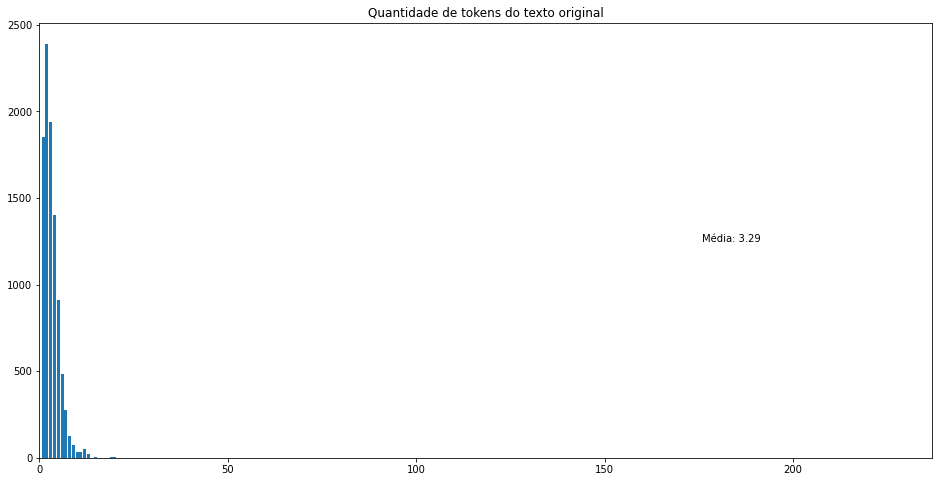

In [35]:
title = str('Quantidade de tokens do texto original')
text = str(f'Média: {str(round(sum([k*v for k,v in original.items()])/sum(v for v in original.values()), 2))}')
plot_hist_from_dict(original, title, text)

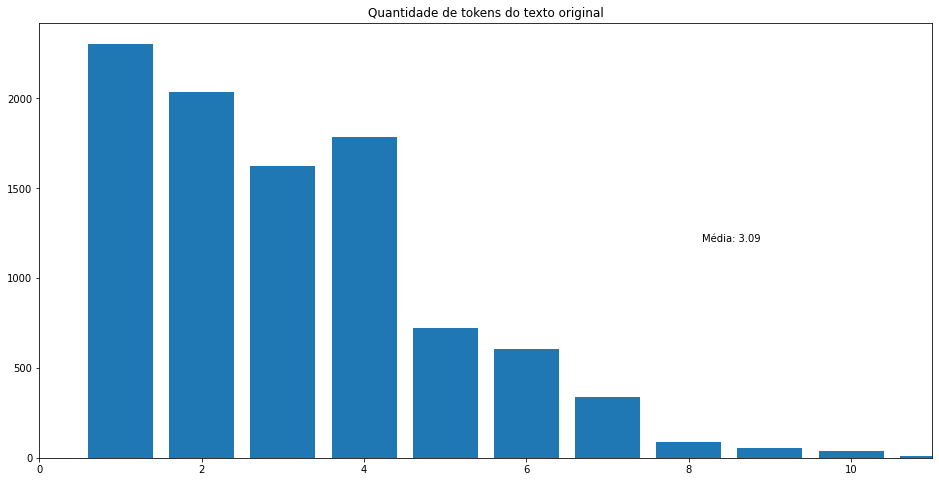

In [36]:
title = str('Quantidade de tokens do texto original')
text = str(f'Média: {str(round(sum([k*v for k,v in prep.items()])/sum(v for v in prep.values()), 2))}')
plot_hist_from_dict(prep, title, text)

### Anslysis Result

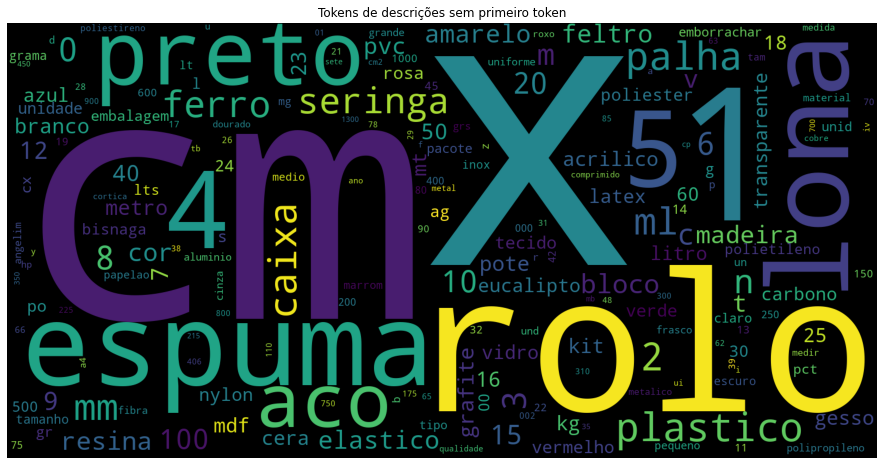

In [37]:
word_cloud(noWordsTokensFreq, 'Tokens de descrições sem primeiro token')
## Tokens de descrições sem primeiro token excluindo tokens classificados

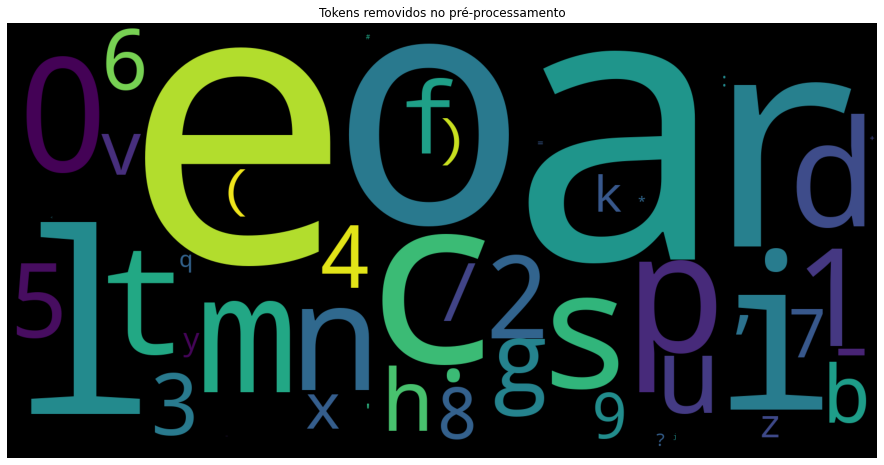

In [38]:
word_cloud(removedTokens, 'Tokens removidos no pré-processamento', prefer_horizontal=1)

In [ ]:
word_cloud(correctionPairs, 'Correções mais frequentes')

In [ ]:
word_cloud(changedTokens, 'Palavras mais corrigidas')

### Old

In [ ]:
fig = plt.figure()
for i in range(len(categories[:2])):
    freq = []
    freq = get_category_tokens_frequency(itemsDf, categories[i])
    ax = fig.add_subplot(1,2,i+1)
    wordcloud = word_cloud2(freq,  categories[i])
    ax.imshow(wordcloud)
    ax.axis('off')

In [ ]:
noWordsFrequentTokens = dict(sorted(noWordsTokensFreq.items(), key=lambda x: x[1], reverse=True)[:50])
for index, row in noWords[['original', 'original_prep']].iterrows():
    tokens = ast.literal_eval(row['original_prep'])
    for token in tokens:
        if token in list(noWordsFrequentTokens.keys()):
            print('original:', row['original'])  